# Visualization of achieved trees in R

## Packages

In [1]:
install.packages("ape")
install.packages('TreeDist')
install.packages("png")
install.packages("grid")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘rbibutils’, ‘fastmatch’, ‘PlotTools’, ‘RCurl’, ‘R.cache’, ‘Rdpack’, ‘shinyjs’, ‘TreeTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”


In [2]:
library('ape')
library('TreeDist')
library('png')
library('grid')

## Preparing Trees

**newick_tree1** is a tree achieved from MAFFT and IQTREE </br>
**newick_tree2** is a tree achieved from *timetree.org*

In [3]:
newick_tree1 <- '(NR_074235.1:0.1054605862,((((PQ482064.1:0.1346830263,PQ517008.1:0.1311207791):0.0579098759,(PQ482071.1:0.2201719135,pdb|8FMW|A:0.3282288800):0.0462337283):0.0241744623,(LC440032.1:0.3339774724,(PP762185.1:0.0788379450,pdb|6VWM|1:0.1494996940):0.1025630020):0.0231595767):0.0373495067,NR_102443.1:0.1855424724):0.9671716519,OQ120574.1:0.3864227050);'
newick_tree2 <- "(((((Pseudomonas_aeruginosa:1481.02000000,Escherichia_coli:1481.02000000)'14':1368.01000000,Helicobacter_pylori:2849.03000000)'13':150.97000000,Borreliella_burgdorferi:3000.00000000)'25':194.17114000,((Cyanobacterium_aponinum:2936.66828000,(Bacillus_subtilis:2804.88186000,Clostridium_botulinum:2804.88186000)'37':131.78642000)'36':0.63272000,Thermus_aquaticus:2937.30100000)'35':256.87014000)'34':1055.82886000,(Methanobrevibacter_smithii:3464.64737000,Halobacterium_salinarum:3464.64737000)'43':785.35263000);"

Ufortunately, both methods produce trees with different tip labels. Methods which comapre trees, requires trees with the same labels, so it is required to relabel one of them. I decided to change labels of *newick_tree1* to contain taxonomic names as tip labels, instead of NCBI IDs. It produces more readable tree.

 [1] "Methanobrevibacter_smithii" "Clostridium_botulinum"     
 [3] "Bacillus_subtilis"          "Helicobacter_pylori"       
 [5] "Borreliella_burgdorferi"    "Thermus_aquaticus"         
 [7] "Pseudomonas_aeruginosa"     "Escherichia_coli"          
 [9] "Cyanobacterium_aponinum"    "Halobacterium_salinarum"   


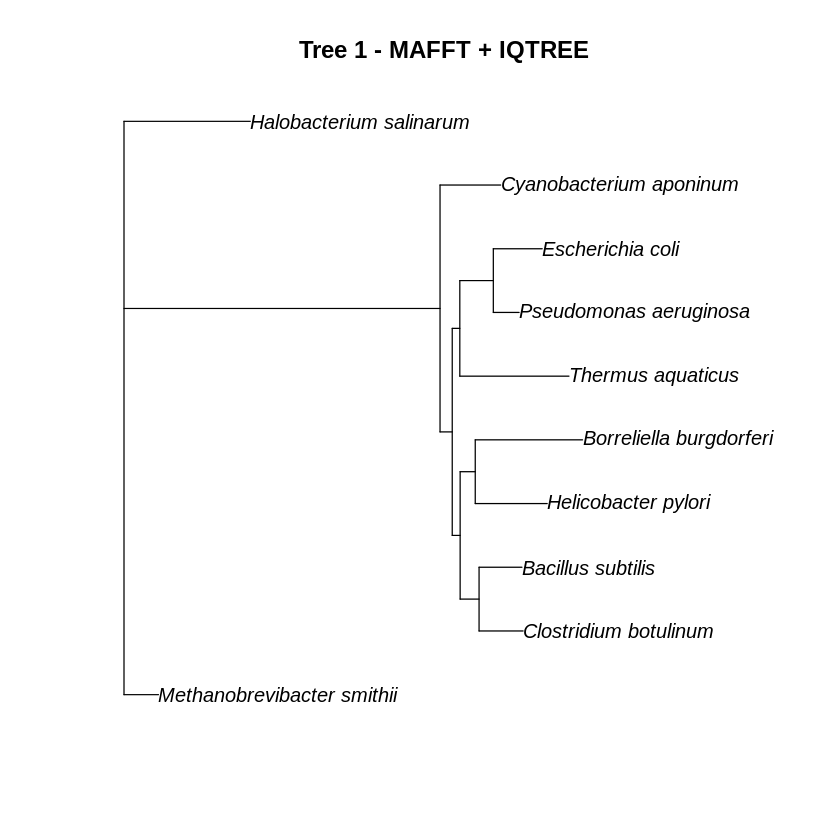

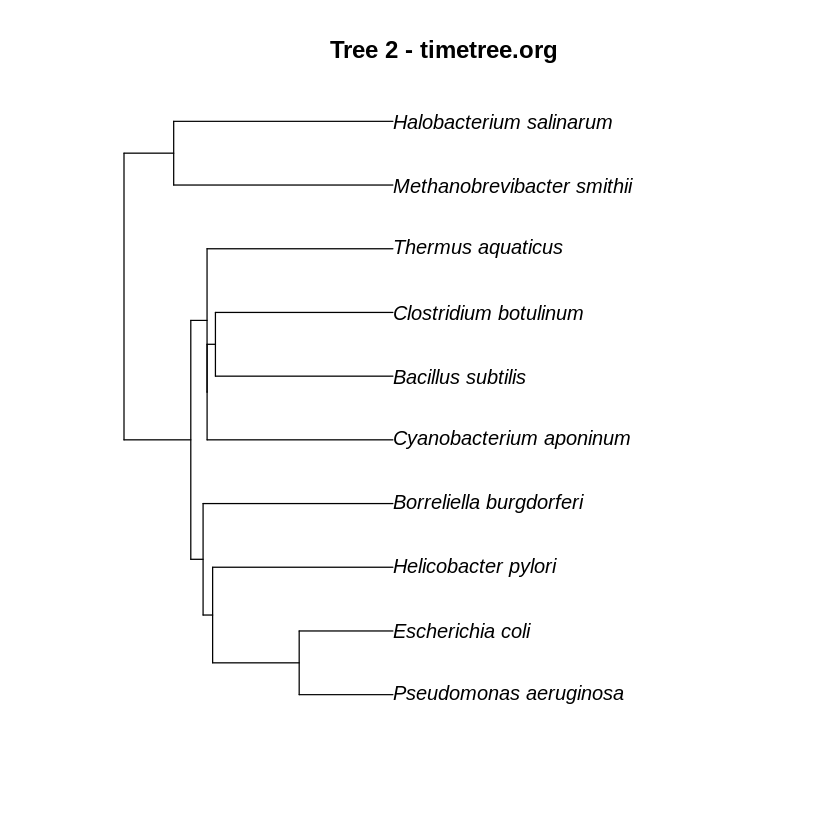

In [4]:
# Define the mapping of original labels to readable names
label_mapping <- c(
  "NR_074235.1" = "Methanobrevibacter_smithii",
  "PQ482064.1" = "Clostridium_botulinum",
  "PQ482071.1" = "Helicobacter_pylori",
  "LC440032.1" = "Thermus_aquaticus",
  "PP762185.1" = "Pseudomonas_aeruginosa",
  "NR_102443.1" = "Cyanobacterium_aponinum",
  "OQ120574.1" = "Halobacterium_salinarum",
  "PQ517008.1" = "Bacillus_subtilis",
  "pdb|6VWM|1" = "Escherichia_coli",
  "pdb|8FMW|A" = "Borreliella_burgdorferi"
)

# Replace each label in the Newick string
for (original_label in names(label_mapping)) {
  newick_tree1 <- gsub(original_label, label_mapping[[original_label]], newick_tree1, fixed = TRUE)
}

# Create the tree objects from newick strings
tree1 <- read.tree(text = newick_tree1)
tree2 <- read.tree(text = newick_tree2)

# Plot or print the tree to verify the labels
print(tree1$tip.label)
plot(tree1, main = "Tree 1 - MAFFT + IQTREE")
plot(tree2, main = "Tree 2 - timetree.org")


## Computing similarity distance between achieved trees

In [5]:
distance <- TreeDistance(tree1, tree2)

In [6]:
distance

[1] 0.495117

## Visualization of trees

In [7]:
png("wide_visualization.png", width = 1800, height = 600, res = 150)
VisualizeMatching(ClusteringInfoDistance, tree1, tree2)
dev.off()

pdf 
  2

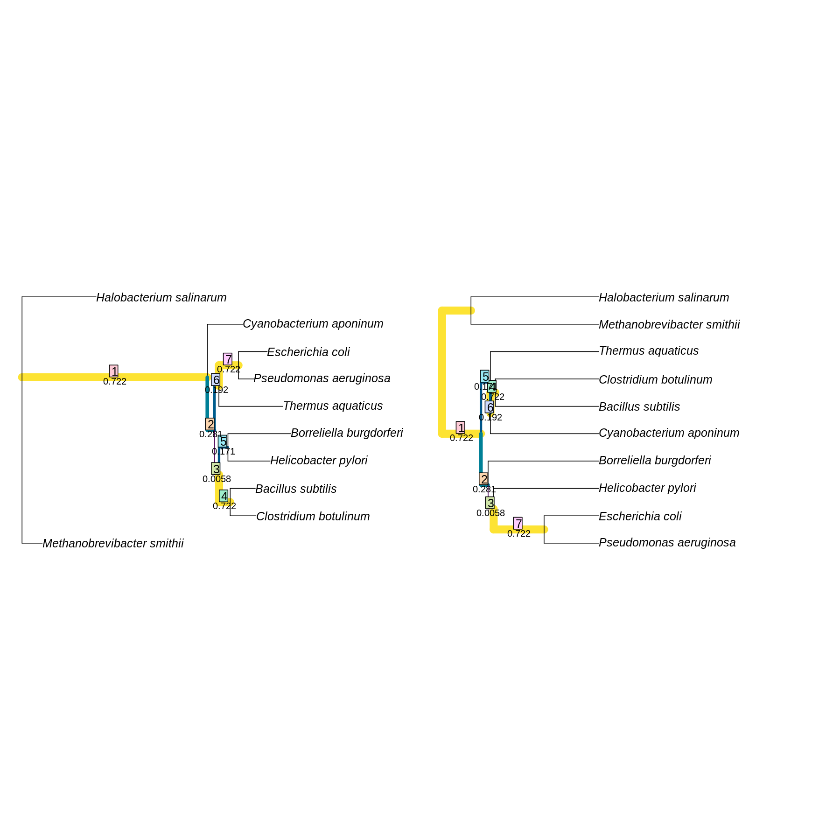

In [8]:
img <- readPNG("wide_visualization.png")
grid.raster(img)